In [1]:
import catboost as ctb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import  mean_absolute_error
from sklearn import datasets
from sklearn import metrics

In [2]:
#KNeighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Load the Amaranthus dataset collected from the Suitelab Smart Farm
dataset = pd.read_csv("Amaranthus_growth_rate_A.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,5].values

#splitting of the Dataset using Sklearn library in ratio 
#of 20% for test and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Create a k-nearest neighbors regressor object
knn = KNeighborsRegressor(n_neighbors=5)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Predict on the test data
    y_predd1 = knn.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_predd1)
    r2 = r2_score(y_test, y_predd1)
    
    # Append scores to the lists
    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the average scores
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

# Print the evaluation metrics
print("Average Mean Squared Error:", avg_mse)
print("Average R-squared:", avg_r2)
print("Predictions:",y_predd1)

Average Mean Squared Error: 0.030173333333333347
Average R-squared: 0.9854849186801763
Predictions: [0.68 0.92 1.34 1.76 1.9  2.18 2.68 4.08]


In [3]:
#Support Vector regressor evaluation
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Load the Amaranthus dataset collected from the Suitelab Smart Farm
dataset = pd.read_csv("Amaranthus_growth_rate_A.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,5].values
#splitting of the Dataset using Sklearn library in ratio 
#of 20% for test and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Create a support vector regression object
svr = SVR(kernel='rbf')

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on the training data
    svr.fit(X_train, y_train)
    
    # Predict on the test data
    y_predd2 = np.round(svr.predict(X_test),decimals=2)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_predd2)
    r2 = r2_score(y_test, y_predd2)
    
    # Append scores to the lists
    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the average scores
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

# Print the evaluation metrics
print("Average Mean Squared Error:", avg_mse)
print("Average R-squared:", avg_r2)
print("Predictions:",y_predd2)

Average Mean Squared Error: 0.030533055555555542
Average R-squared: 0.9854818451456568
Predictions: [0.68 0.9  1.3  1.76 1.92 2.1  2.68 4.16]


In [4]:
#XGBoost regressor evalution
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Load the Amaranthus dataset collected from the Suitelab Smart Farm
dataset = pd.read_csv("Amaranthus_growth_rate_A.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,5].values
#splitting of the Dataset using Sklearn library in ratio 
#of 20% for test and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Create XGBoost regression object
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on the training data
    xgb_reg.fit(X_train, y_train)
    
    # Predict on the test data
    y_predd3 = np.round(xgb_reg.predict(X_test),decimals=2)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_predd3)
    r2 = r2_score(y_test, y_predd3)
    
    # Append scores to the lists
    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the average scores
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

# Print the evaluation metrics
print("Average Mean Squared Error:", avg_mse)
print("Average R-squared:", avg_r2)
print("Predictions:",y_predd3)


Average Mean Squared Error: 0.019916668936614073
Average R-squared: 0.9864553845971022
Predictions: [0.8 1.1 1.5 1.9 2.1 2.2 2.7 4.4]


In [5]:
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Load the Amaranthus dataset collected from the Suitelab Smart Farm
dataset = pd.read_csv("Amaranthus_growth_rate_A.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,5].values
#splitting of the Dataset using Sklearn library in ratio 
#of 20% for test and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Create a quantile regression object
quant_reg = QuantileRegressor()

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on the training data
    quant_reg.fit(X_train, y_train)
    
    # Predict on the test data
    y_predd4 = np.round(quant_reg.predict(X_test),decimals=2)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_predd4)
    r2 = r2_score(y_test, y_predd4)
    
    # Append scores to the lists
    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the average scores
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

# Print the evaluation metrics
print("Average Mean Squared Error:", avg_mse)
print("Average R-squared:", avg_r2)
print("Predictions:",y_predd4)

Average Mean Squared Error: 0.01980833333333333
Average R-squared: 0.9875787354776486
Predictions: [0.71 0.92 1.29 1.73 1.87 2.06 2.83 4.06]


In [6]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Load the Amaranthus dataset collected from the Suitelab Smart Farm
dataset = pd.read_csv("Amaranthus_growth_rate_A.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,5].values

#splitting of the Dataset using Sklearn library in ratio 
#of 20% for test and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Create a Decision Tree Regression object
tree_reg = DecisionTreeRegressor()

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on the training data
    tree_reg.fit(X_train, y_train)
    
    # Predict on the test data
    y_predd5 = np.round(tree_reg.predict(X_test),decimals=2)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_predd5)
    r2 = r2_score(y_test, y_predd5)
    
    # Append scores to the lists
    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the average scores
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

# Print the evaluation metrics
print("Average Mean Squared Error:", avg_mse)
print("Average R-squared:", avg_r2)
print("Predictions:",y_predd5)

Average Mean Squared Error: 0.018944444444444437
Average R-squared: 0.9880157554099064
Predictions: [0.6 0.9 1.3 1.9 1.9 2.1 2.7 4. ]


In [7]:
#Theil-Sen Regressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Load the Amaranthus dataset collected from the Suitelab Smart Farm
dataset = pd.read_csv("Amaranthus_growth_rate_A.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,5].values

#splitting of the Dataset using Sklearn library in ratio 
#of 20% for test and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Create a Theil-Sen Regression object
theil_sen_reg = TheilSenRegressor()

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on the training data
    theil_sen_reg.fit(X_train, y_train)
    
    # Predict on the test data
    y_predd6 = np.round(theil_sen_reg.predict(X_test),decimals=2)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_predd6)
    r2 = r2_score(y_test, y_predd6)
    
    # Append scores to the lists
    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the average scores
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

# Print the evaluation metrics
print("Average Mean Squared Error:", avg_mse)
print("Average R-squared:", avg_r2)


# Print the evaluation metrics
print("Average Mean Squared Error:", avg_mse)
print("Average R-squared:", avg_r2)
print("Predictions:",y_predd6)

Average Mean Squared Error: 0.013425833333333326
Average R-squared: 0.992703989336398
Average Mean Squared Error: 0.013425833333333326
Average R-squared: 0.992703989336398
Predictions: [0.76 0.96 1.39 1.86 2.03 2.15 2.7  4.09]


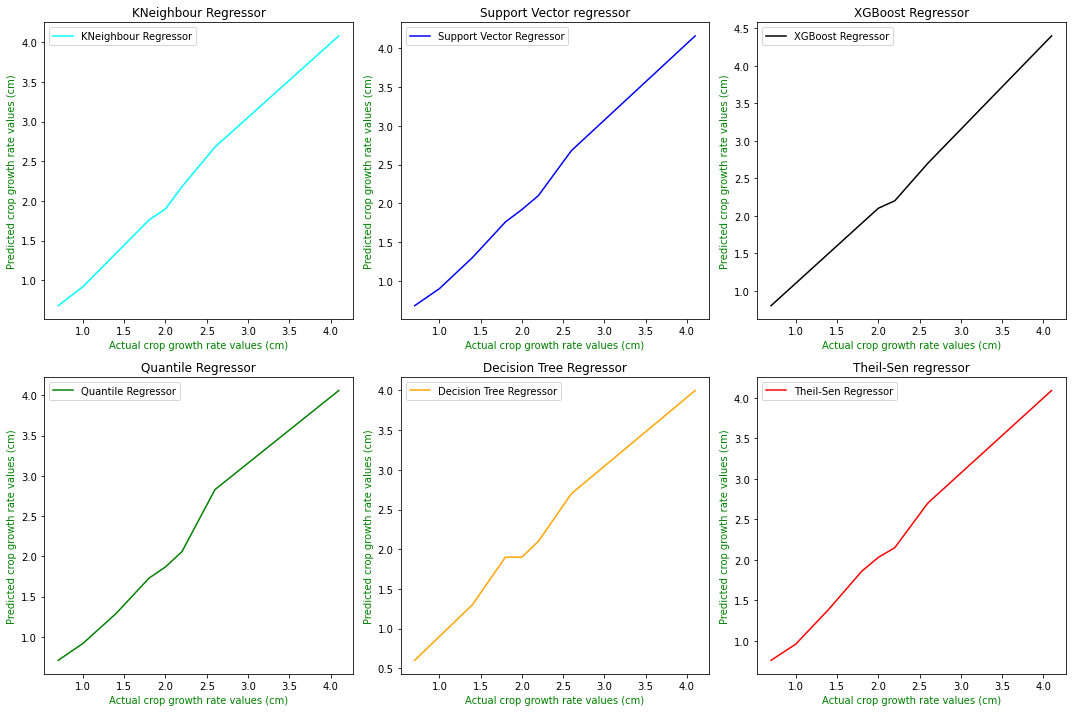

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# First subplot
ax = sns.lineplot(x=y_test, y=y_predd1, label='KNeighbour Regressor', color='cyan', ax=axes[0, 0])
ax.set_title('KNeighbour Regressor')
ax.set_xlabel('Actual crop growth rate values (cm)', color='g')
ax.set_ylabel('Predicted crop growth rate values (cm)', color='g')

# Second subplot
ax1 = sns.lineplot(x=y_test, y=y_predd2, label='Support Vector Regressor', color='blue', ax=axes[0, 1])
ax1.set_title('Support Vector regressor')
ax1.set_xlabel('Actual crop growth rate values (cm)', color='g')
ax1.set_ylabel('Predicted crop growth rate values (cm)', color='g')

# Third subplot
ax2 = sns.lineplot(x=y_test, y=y_predd3, label='XGBoost Regressor', color='black', ax=axes[0, 2])
ax2.set_title('XGBoost Regressor')
ax2.set_xlabel('Actual crop growth rate values (cm)', color='g')
ax2.set_ylabel('Predicted crop growth rate values (cm)', color='g')

# Fourth subplot
ax3 = sns.lineplot(x=y_test, y=y_predd4, label='Quantile Regressor', color='green', ax=axes[1, 0])
ax3.set_title('Quantile Regressor')
ax3.set_xlabel('Actual crop growth rate values (cm)', color='green')
ax3.set_ylabel('Predicted crop growth rate values (cm)', color='green')

# Fifth subplot
ax4 = sns.lineplot(x=y_test, y=y_predd5, label='Decision Tree Regressor', color='orange',ax=axes[1, 1])
ax4.set_title('Decision Tree Regressor')
ax4.set_xlabel('Actual crop growth rate values (cm)', color='g')
ax4.set_ylabel('Predicted crop growth rate values (cm)', color='g')

# Sixth subplot
ax5 = sns.lineplot(x=y_test, y=y_predd6, label='Theil-Sen Regressor', color='red', ax=axes[1, 2])
ax5.set_title('Theil-Sen regressor')
ax5.set_xlabel('Actual crop growth rate values (cm)', color='g')
ax5.set_ylabel('Predicted crop growth rate values (cm)', color='g')

# Adjust spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()